### Analyzing the Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

(1) What is the independent variable? What is the dependent variable?

- A variable that changes or being controlled in an experiment is called an **independent** variable.
- The variable which is of the interest and effects of which we want to measure is called **dependent** variable.

In a nutshell, we want to measure impact of dependent variable based upon independent variable. In our dataset, the two columns, congruent and incongruent is the independent variable and the time measured for each is the dependent variable.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis would be that our experiement has little or no impact on the response time irrespective of the color of the word. Alternatively, the alternative hypothesis would be that incongruent task takes longer time compared to congruent task. <br>
<center>
$H_{0}$: $\mu_{incongruent} \leq \mu_{congruent}$ <br>
$H_{A}$: $\mu_{incongruent} \ge \mu_{congruent}$ </center> <br>
In other words, <br> **Null Hypothesis:** The *average* time taken for incongruent task is less or equal to congruent task. <br> **Alternative Hypothesis:** The *average* time taken for incongruent task is greater than the congruent task.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [43]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
%matplotlib inline

In [5]:
# read dataset
stroop = pd.read_csv('stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [7]:
# change the column header to lower case for ease of typing
stroop.columns = stroop.columns.str.lower()

In [8]:
stroop.describe()

,congruent,incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


On an average, the congruent task took 14.05 seconds and incongruent task took 22.02 seconds in our sample set. <br>
The standard deviation of congruent and incongruent is 3.56 and 4.80 seconds respectively.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [26]:
con_mean = stroop.describe().loc['mean'][0]
incon_mean = stroop.describe().loc['mean'][-1]

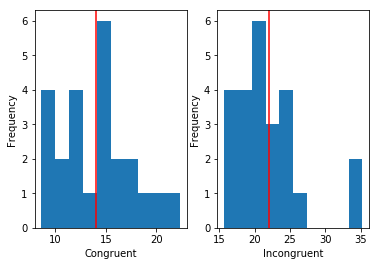

In [34]:
# visualization: congruent distribtuion
plt.subplot(1, 2, 1)
stroop['congruent'].plot(kind='hist')
plt.xlabel('Congruent')
plt.axvline(con_mean, color='r')

plt.subplot(1, 2, 2)
stroop['incongruent'].plot(kind='hist')
plt.xlabel('Incongruent')
plt.axvline(incon_mean, color='r');

The distributions of congruent and incongruent task are non-normal. The congruent is bi-modal (maybe even tri-modal!!) whereas incongruent task's distribution is skewed. The red vertical line represents the mean of the distributions.

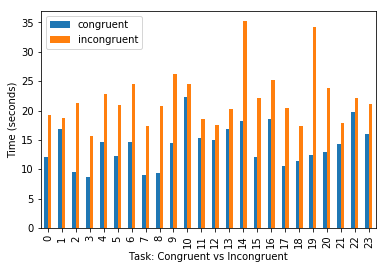

In [39]:
# bar chart
stroop.plot(kind='bar')
plt.xlabel('Task: Congruent vs Incongruent')
plt.ylabel('Time (seconds)');

Above bar chart is a comparison of times with respect to congruent and incongruent tasks. ALL of the data points clearly indicates that the time taken for incongruent tasks are exceeding congruent task.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [44]:
# t-test
ttest_rel(a=stroop.congruent, b=stroop.incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In this particular case, we would chose a **t-test** for determine whether we reject the null hypothesis or fail to accept alternative hypothesis. A t-test is a statistic that checks if two means are *reliably* different from each other. Given the descriptive statistics we saw in above analysis, now it's time to do infer whether the statistics we obtained from sample can be also applied to population. <br> In this section, we will achieve by running a t-test. Bootstrapping could be another way to infer the same for whole population. The confidence level of 5% is sufficient for this kind of test, since the experiment does not involve any life threating consequences. <br> A t-test can be seen as computing singal to noise ratio. The signal being difference between observations and easier to detect when there is less noise. <br> We obtained t-stastistic of -8.02 and corresponding p-value of 4.10e-08. The p-value is the probability that the pattern of data in the sample could be produced by random data. And this p-value we obtained is way smaller than 0.05 of type-I error we are willing to make. This signifies that we reject the null hypthesis and can conclude that the average time taken for incongruent task is greater than the congruent task

(6) What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Upon researching, there are three leading theories explaining stroop effect. <br> - Speed of Processing Theory <br> - Selective Attention Theory <br> - Automatic Word Recognition Hypothesis. <br> For more, checkout this interesting [YouTube Video](https://www.youtube.com/watch?v=EGpzftQf8oI) <br> An alternative similar task could be a geometric shape such as square, rectangle, triangle etc. with respect to their names and vice versa.